## Notebook for reproducing map-view summary images

In [ ]:
import geopandas as gpd
import terminus as terminus
from rasterstats import zonal_stats
import pandas as pd
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors 
from matplotlib import cm
from rasterio import plot as rasterplot
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

mpl.rcParams.update({'font.size': 22})

In [237]:
glacierid = '181'
name = 'hel'

In [251]:
bed = rio.open('BedMachine/bm_v4_bed.tif')
#bed = rio.open('bm_hs.tif')

glac = gpd.read_file('morphology_termini/selected_glacs/'+glacierid +'.shp')

sinuo = gpd.read_file('Sinuosity/corrected/pw_'+glacierid +'_summer_10th.shp')

In [241]:
img_pad = 500

bed_vmin = -1000

bed_vmax = 300

In [260]:
glac = gpd.read_file('morphology_termini/selected_glacs/'+glacierid +'.shp')


In [261]:
#colorbar for the bed doesn't work for Helheim for some reason- added in post

no plumes


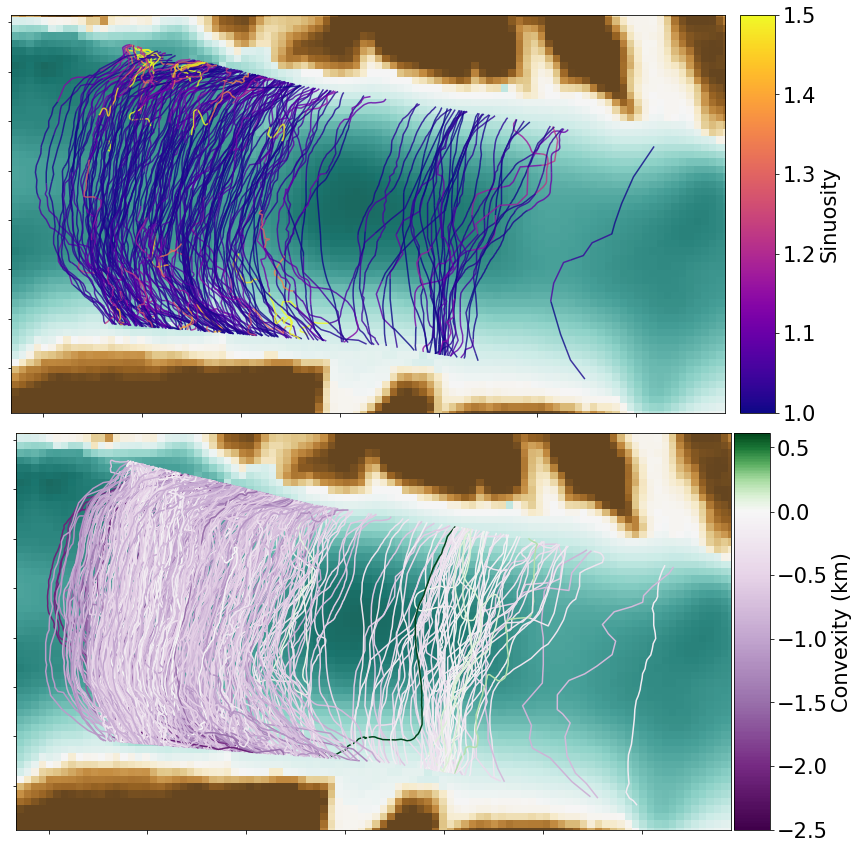

In [262]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(15,15))

normalize = mcolors.TwoSlopeNorm(vmin=bed_vmin,vcenter=0, vmax=bed_vmax)
colormap = cm.BrBG_r
rasterplot.show(bed, ax=ax1,cmap=colormap, norm=normalize, alpha = 0.9)
rasterplot.show(bed, ax=ax2,cmap=colormap, norm=normalize, alpha = 0.9)

if name != 'hel':
    #BedMachine Colorbar
    divider = make_axes_locatable(ax2)
    caxb = divider.append_axes('right', size='5%', pad=3.5)

    cb_bed = mpl.colorbar.ColorbarBase(norm=normalize,cmap=colormap,
                                    orientation='vertical', ax= caxb)
    cb_bed.set_label('Bed (m)')

try:
    plumes = gpd.read_file('plumes/'+name+'_centroids.shp')
    plumes=plumes.to_crs(glac.crs)

    firstplume = year_fraction(pd.to_datetime(plumes['Date'].iloc[0]))
    lastplume = year_fraction(pd.to_datetime(plumes['Date'].iloc[-1]))
    #Plumes colored by Date
    plumes.plot(ax=ax1, zorder = 3,alpha = 0.8,column = 'Date',cmap='Blues',s=100)

    #Plume Colorbar
    divider = make_axes_locatable(ax1)
    caxp = divider.append_axes('right', size='5%', pad=3.5)
    cmap = mpl.cm.Blues
    norm = mpl.colors.Normalize(vmin = firstplume, vmax = lastplume)

    cb1 = mpl.colorbar.ColorbarBase(ax=caxp, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    cb1.set_label('Plume Date')
except:
    print('no plumes')


#SINUOSITY


#sinuosity map
#glac.iloc[::4, :].plot(column='sinuosity',ax=ax1, cmap='cividis',vmax = 1.5, vmin = 1)
sin=sinuo.plot(column='Sinuo',ax=ax1, cmap='plasma',vmax = 1.5, vmin = 1, alpha = 0.8,zorder=2)
ax1.set_yticklabels([])
ax1.set_xticklabels([])


#Sinuosity Colorbar
divider = make_axes_locatable(ax1)
caxs = divider.append_axes('right', size='5%', pad="2%")
cmap = mpl.cm.plasma
norm = mpl.colors.Normalize( vmin = 1, vmax = 1.5)

cb_s = mpl.colorbar.ColorbarBase(ax=caxs, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb_s.set_label('Sinuosity')



#HULL AREA
vmin = glac['convexity'].min()
vmax = glac['convexity'].max()

if name == 'sil' or name =='kan'or name =='hel':
    glac['convexity']= glac['convexity']/1000

if (vmin < 0) & (vmax < 0):
    ##Negative colors only
    vcenter = 0
    vmin = glac['convexity'].min()
    vmax=glac['convexity'].max()
    colormap = cm.Purples_r


    ch_img = glac.iloc[::4, :].plot(column='convexity',ax=ax2, cmap=colormap)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    
    #Convex Colorbar
    divider = make_axes_locatable(ax2)
    caxc = divider.append_axes('right', size='5%', pad=0.05)
    cmap = mpl.cm.Purples_r
    norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)

    cb1 = mpl.colorbar.ColorbarBase(ax=caxc, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    cb1.set_label('Convexity')

    
    
elif (vmin > 0) & (vmax > 0):
    ##positive colors only
    vcenter = 0
    vmin = glac['convexity'].min()
    vmax=glac['convexity'].max()
    colormap = cm.Greens_r

    ch_img = glac.iloc[::4, :].plot(column='convexity',ax=ax2, cmap=colormap)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
                           
    #Convex Colorbar
    divider = make_axes_locatable(ax2)
    caxc = divider.append_axes('right', size='5%', pad=0.05)
    cmap = mpl.cm.Greens_r
    norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)

    cb1 = mpl.colorbar.ColorbarBase(ax=caxc, cmap=cmap,
                                    norm=norm,
                                    orientation='vertical')
    cb1.set_label('Convexity')
                       
                           
else:
    ##positive and negative colors
    vcenter = 0
    vmin = glac['convexity'].min()
    vmax=glac['convexity'].max()
    normalize = mcolors.TwoSlopeNorm(vmin=vmin,vcenter=vcenter, vmax=vmax)
    colormap = cm.PRGn

    ch_img = glac.iloc[::4, :].plot(column='convexity',ax=ax2, cmap=colormap,norm=normalize)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
                           
                           
    #Convex Colorbar
    divider = make_axes_locatable(ax2)
    caxc = divider.append_axes('right', size='5%', pad=0.05)

    cb1 = mpl.colorbar.ColorbarBase(norm=normalize,cmap=colormap,
                                    orientation='vertical', ax= caxc)
    
    if name == 'sil' or name =='kan'or name =='hel':
        cb1.set_label('Convexity (km)')
    else:
        cb1.set_label('Convexity (m)')

    
xmin, ymin, xmax, ymax = glac.total_bounds
pad = img_pad  # add a padding around the geometry
ax1.set_xlim(xmin-pad, xmax+pad)
ax1.set_ylim(ymin-pad, ymax+pad)
ax2.set_xlim(xmin-pad, xmax+pad)
ax2.set_ylim(ymin-pad, ymax+pad)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.05)

plt.savefig('Figures/Paper/main/summary/updated/'+glacierid+'.png', bbox_inches = 'tight')